# Preparing the Data

- Creating the Dataset
- Impute the missing values
- One-Hot encoding with category_encoder Package
- Ordinal encoding with category_encoder Package
- Scaling (StandardScaler, MinMaxScaler, RobustScaler)
- Feature Selection

In [1]:
import category_encoders as ce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating the data set

In [2]:
df = pd.DataFrame({'gender': np.random.binomial(1, 0.6, 100),
                   'height': np.random.normal(0, 10, 100),
                   'noise': np.random.normal(0, 2, 100)})
df.head(10)

,gender,height,noise
0,1,1.305758,-0.413034
1,1,7.169836,0.583684
2,0,-8.650494,-1.625175
3,1,10.665560,2.605391
4,0,7.433363,3.212200
5,1,-14.600796,-0.551297
6,0,3.068546,-1.108445
7,1,13.608081,0.712942
8,0,-10.032306,-0.695774
9,0,-2.127142,6.851409


In [3]:
df['height'] = df['height'] + df['gender'].apply(lambda x: 160 if x else 180)
df['weight'] = df['height'] + df['noise'] -110

In [4]:
df['height_with75nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.25) else np.nan)
df['height_with10nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.9) else np.nan)

In [5]:
df

,gender,height,noise,weight,height_with75nan,height_with10nan
0,1,161.305758,-0.413034,50.892724,161.305758,161.305758
1,1,167.169836,0.583684,57.753520,167.169836,167.169836
2,0,171.349506,-1.625175,59.724331,171.349506,171.349506
3,1,170.665560,2.605391,63.270950,NaN,170.665560
4,0,187.433363,3.212200,80.645563,NaN,187.433363
...,...,...,...,...,...,...
95,1,157.253422,0.912146,48.165568,157.253422,157.253422
96,0,180.310049,-0.655223,69.654827,180.310049,180.310049
97,1,161.699335,-0.935074,50.764261,NaN,NaN
98,1,162.374941,1.115926,53.490866,NaN,NaN


In [6]:
df[['gender', 'height_with75nan', 'weight']].isna().mean()

gender              0.00
height_with75nan    0.67
weight              0.00
dtype: float64

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_11200\4152897437.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


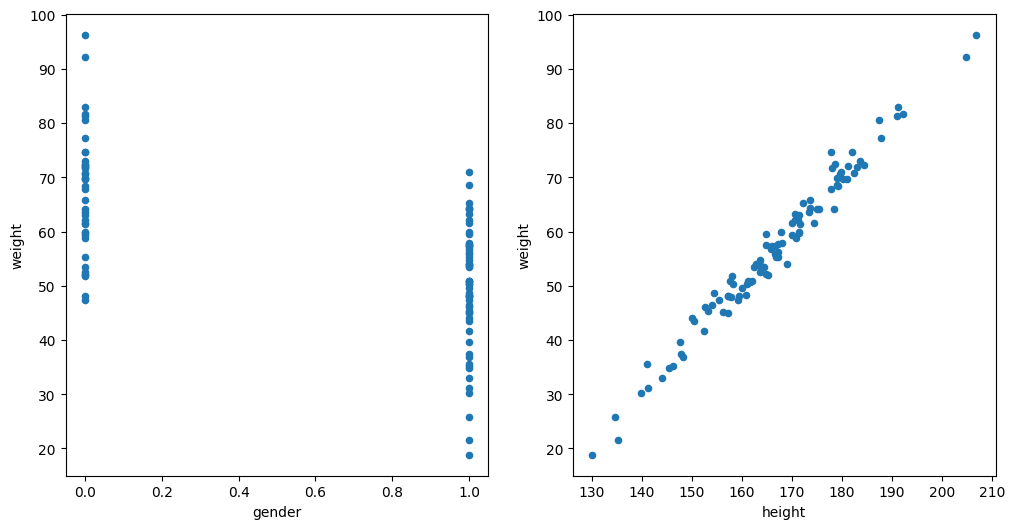

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df.plot(
    kind='scatter',
    x='gender',
    y='weight',
    ax=axs[0]
)

df.plot(
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[1]
)

fig.show()

## Simple Imputer

In [9]:
# impute values with fillna
df['height (75% zero imputed)'] = df['height_with75nan'].fillna(0)
df.describe()

,gender,height,noise,weight,height_with75nan,height_with10nan,height (75% zero imputed)
count,100.000000,100.000000,100.000000,100.000000,33.000000,91.000000,100.000000
mean,0.590000,166.472481,0.260744,56.733226,167.106222,167.286813,55.145053
std,0.494311,14.280931,2.111062,14.291998,11.039810,14.288787,79.220351
min,0.000000,130.127106,-5.107998,18.836827,146.315740,130.127106,0.000000
25%,0.000000,157.734440,-1.109301,48.143328,161.047350,158.090498,0.000000
50%,1.000000,166.661661,-0.069945,56.575576,166.639531,167.169836,0.000000
75%,1.000000,176.064487,1.530448,65.473429,171.444586,177.858338,160.853626
max,1.000000,206.859466,6.851409,96.295039,206.859466,206.859466,206.859466


In [20]:
# This block is not from the book. for testing only
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean') # mean is 167.28
imp_val1 = imp.fit_transform(df[['height_with10nan']])[:, 0] # the [:, 0] is nessecary to change (100,1) to (100,) -> Matrix to Vector
imp_val1


array([161.30575838, 167.16983579, 171.34950597, 170.66555958,
       187.43336254, 145.39920387, 183.06854642, 173.60808141,
       169.96769367, 177.87285834, 144.02250073, 170.02330095,
       167.94863491, 164.36022689, 174.99415099, 155.54831121,
       157.76753561, 141.1661731 , 167.87546288, 167.28681323,
       166.84055003, 179.7333329 , 158.00855978, 167.28681323,
       166.68379057, 170.82044116, 175.47137725, 147.78781887,
       187.87844611, 160.7890511 , 165.22882692, 191.06912182,
       171.44458566, 179.11419819, 171.53719012, 181.24010755,
       178.09147276, 173.51600999, 134.72549521, 164.81876836,
       163.69170106, 162.05748797, 162.7649981 , 167.28681323,
       156.26739339, 150.54451746, 192.25674174, 154.12705671,
       206.85946636, 204.75379406, 167.28681323, 139.78367767,
       152.41303247, 159.2104526 , 152.73758275, 181.11227625,
       183.64505044, 166.08716859, 153.23502822, 179.10901167,
       161.04734979, 182.00252597, 177.84381807, 157.18

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['height (10% mean imputed)'] = imp.fit_transform(df[['height_with10nan']])[:, 0] # fit_transform returns a matrix; [:, 0] turns it into a series
df['height (75% mean imputed)'] = imp.fit_transform(df[['height_with75nan']])[:, 0] # fit_transform returns a matrix; [:, 0] turns it into a series
df.describe()

,gender,height,noise,weight,height_with75nan,height_with10nan,height (75% zero imputed),height (10% mean imputed),height (75% mean imputed)
count,100.000000,100.000000,100.000000,100.000000,33.000000,91.000000,100.000000,100.000000,100.000000
mean,0.590000,166.472481,0.260744,56.733226,167.106222,167.286813,55.145053,167.286813,167.106222
std,0.494311,14.280931,2.111062,14.291998,11.039810,14.288787,79.220351,13.623824,6.276521
min,0.000000,130.127106,-5.107998,18.836827,146.315740,130.127106,0.000000,130.127106,146.315740
25%,0.000000,157.734440,-1.109301,48.143328,161.047350,158.090498,0.000000,159.396073,167.106222
50%,1.000000,166.661661,-0.069945,56.575576,166.639531,167.169836,0.000000,167.286813,167.106222
75%,1.000000,176.064487,1.530448,65.473429,171.444586,177.858338,160.853626,175.113458,167.106222
max,1.000000,206.859466,6.851409,96.295039,206.859466,206.859466,206.859466,206.859466,206.859466


Iterative Imputer uses neighbouring features to get better imputed values
We use gender here to tell the function that the height should be considered for females and males separately

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan)
df['height (75% iterative imputed)'] = imp.fit_transform(df[['height_with75nan', 'gender']])[:, 0]

In [59]:
from sklearn.impute import MissingIndicator

# MissingIndicator gives back a vector with boolean values that change the missing_values to True
imp = MissingIndicator(missing_values=np.nan)
df['height (is missing?)'] = imp.fit_transform(df[['height_with75nan']])[:, 0]
df[df['height (is missing?)'] == 0]['height (is missing?)'] 

# the following line would result the same
# df[~(df['height (75% zero imputed)'] == 0)]['height (is missing?)']

0     False
1     False
2     False
7     False
8     False
12    False
13    False
15    False
23    False
25    False
26    False
29    False
32    False
35    False
40    False
42    False
44    False
45    False
48    False
54    False
57    False
60    False
61    False
69    False
76    False
81    False
82    False
85    False
91    False
92    False
94    False
95    False
96    False
Name: height (is missing?), dtype: bool

Plots of the created features can be found in the PACKT book ML Hands-on

## Encoding non-numerical columns

### Data set

In [23]:
df = pd.DataFrame({'Size': np.random.choice(['XS', 'S', 'M', 'L', 'XL', 'XXL'], 10), 'Brand': np.random.choice(['Nike', 'Puma', 'Adidas', 'Le Coq', 'Reebok'], 10)})
df

,Size,Brand
0,M,Adidas
1,L,Adidas
2,S,Adidas
3,L,Adidas
4,M,Nike
5,XL,Nike
6,XXL,Nike
7,M,Reebok
8,XL,Reebok
9,XL,Le Coq


### Splitting the Dataset

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5)

In [25]:
df_train['Size'].value_counts()

M     3
XL    2
Name: Size, dtype: int64

In [26]:
# read out all randomly chosen values in a list
print(type(df_train['Size'].value_counts().index))
print(type(df_train['Size'].value_counts().index.values))
print(type(df_train['Size'].value_counts().index.values.tolist()))
df_train['Size'].value_counts().index.values.tolist()

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>
<class 'list'>


['M', 'XL']

In [27]:
print(f'The train Dataset has the following Sizes: {df_train["Size"].value_counts().index.values.tolist()} while the \n'
      f'test Dataset has the following Sizes {df_test["Size"].value_counts().index.values.tolist()}')

The train Dataset has the following Sizes: ['M', 'XL'] while the 
test Dataset has the following Sizes ['L', 'XL', 'S', 'XXL']


## One-Hot Encoding

In [28]:
from category_encoders.one_hot import OneHotEncoder
encoder = OneHotEncoder(use_cat_names=True, handle_unknown='return_nan')
x_train = encoder.fit_transform(df_train)
x_test = encoder.transform(df_test)

In [29]:
df_train, df_test

(  Size   Brand
 5   XL    Nike
 9   XL  Le Coq
 7    M  Reebok
 4    M    Nike
 0    M  Adidas,
   Size   Brand
 8   XL  Reebok
 2    S  Adidas
 3    L  Adidas
 6  XXL    Nike
 1    L  Adidas)

In [30]:
x_train

,Size_XL,Size_M,Brand_Nike,Brand_Le Coq,Brand_Reebok,Brand_Adidas
5,1.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0
0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
x_test

,Size_XL,Size_M,Brand_Nike,Brand_Le Coq,Brand_Reebok,Brand_Adidas
8,1.0,0.0,0.0,0.0,1.0,0.0
2,NaN,NaN,0.0,0.0,0.0,1.0
3,NaN,NaN,0.0,0.0,0.0,1.0
6,NaN,NaN,1.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,0.0,1.0


Setting the unknown values to zero

In [33]:
encoder = ce.one_hot.OneHotEncoder(use_cat_names=True, handle_unknown='value')
x_train = encoder.fit_transform(df_train)
x_test = encoder.transform(df_test)

In [34]:
x_test

,Size_XL,Size_M,Brand_Nike,Brand_Le Coq,Brand_Reebok,Brand_Adidas
8,1,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
6,0,0,1,0,0,0
1,0,0,0,0,0,1


## Ordinal Encoder

In [35]:
# first create a new df that only consists of the Size
df_size = df['Size'].copy()
df_size_train, df_size_test = train_test_split(df_size, test_size=0.5)

In [36]:
from category_encoders import OrdinalEncoder

oencoder = OrdinalEncoder(mapping=[{'col': 'Size', 'mapping':{'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5}}])

df_train.loc[:, 'Size [Ordinal Encoded]'] = oencoder.fit_transform(df_train['Size'])['Size'].values
df_test.loc[:, 'Size [Ordinal Encoded]'] = oencoder.transform(df_test['Size'])['Size'].values

In [38]:
df_test, df_train

(  Size   Brand  Size [Ordinal Encoded]
 8   XL  Reebok                     5.0
 2    S  Adidas                     2.0
 3    L  Adidas                     4.0
 6  XXL    Nike                    -1.0
 1    L  Adidas                     4.0,
   Size   Brand  Size [Ordinal Encoded]
 5   XL    Nike                       5
 9   XL  Le Coq                       5
 7    M  Reebok                       3
 4    M    Nike                       3
 0    M  Adidas                       3)

## Scaling

In [41]:
from sklearn import datasets

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [42]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[wine.feature_names]
x_test  = df_test[wine.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform (x_test)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [45]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Feature Selection

### Creating the Dataset

In [46]:
from sklearn import datasets

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[wine.feature_names]
x_test  = df_test[wine.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

## Variance Threshold

In [48]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(x_train)

VarianceThreshold(threshold=0)

In [50]:
pd.DataFrame({'Feature': wine.feature_names, 'Variance': vt.variances_}).sort_values('Variance', ascending=True)

,Feature,Variance
7,nonflavanoid_phenols,0.013845
10,hue,0.055709
2,ash,0.068327
8,proanthocyanins,0.306081
5,total_phenols,0.369353
11,od280/od315_of_diluted_wines,0.478116
0,alcohol,0.679757
6,flavanoids,0.925865
1,malic_acid,0.987016
9,color_intensity,5.612742


In [51]:
vt = VarianceThreshold(threshold=5)
vt.fit(x_train)
# PACKT don't uses transform as there is another function .get_support() which gives back a vector with True False which can be used for masking
# x_train_new, x_test_new = vt.transform(x_train), vt.transform(x_test)

VarianceThreshold(threshold=5)

In [53]:
# x_train_new = x_train.iloc[:, vt.get_support()]
# Next line give back the x_train with a higher vt value than 5
x_train.iloc[:, vt.get_support()]

,alcalinity_of_ash,magnesium,color_intensity,proline
131,20.0,104.0,5.40,530.0
16,20.0,120.0,6.20,1280.0
106,19.0,80.0,3.40,510.0
64,19.0,104.0,2.95,355.0
68,17.0,110.0,3.17,750.0
...,...,...,...,...
102,21.0,98.0,2.80,438.0
100,17.5,97.0,3.30,710.0
44,17.0,107.0,5.04,885.0
132,24.0,98.0,5.70,560.0


The issue here is that the features weren't scaled and the biggest numbers created the highest variance. We first have to scale
the features that all features are equally important. We can't use the StandardScaler as it changes the values to N(0,1). We
don't want a standard deviation of 1. Therefore we take the MinMaxScaler

In [54]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

vt = VarianceThreshold(threshold=0)
vt.fit(x_train_scaled)

VarianceThreshold(threshold=0)

In [55]:
pd.DataFrame({'Feature': wine.feature_names, 'Variance': vt.variances_}).sort_values('Variance', ascending=True)

,Feature,Variance
4,magnesium,0.027419
2,ash,0.029189
3,alcalinity_of_ash,0.032743
10,hue,0.036823
8,proanthocyanins,0.037160
6,flavanoids,0.041209
5,total_phenols,0.043918
9,color_intensity,0.044269
0,alcohol,0.047075
1,malic_acid,0.049843


In [59]:
# Coefficient of variation

df_variances = x_train.apply([np.mean, np.var, np.std]).T
df_variances

,mean,var,std
alcohol,12.975283,0.686231,0.828391
malic_acid,2.143868,0.996416,0.998207
ash,2.357642,0.068978,0.262637
alcalinity_of_ash,19.478302,8.999049,2.999841
magnesium,99.915094,234.287960,15.306468
total_phenols,2.284151,0.372870,0.610631
flavanoids,2.046792,0.934683,0.966790
nonflavanoid_phenols,0.361038,0.013977,0.118224
proanthocyanins,1.580755,0.308996,0.555874
color_intensity,4.982547,5.666196,2.380377


In [62]:
df_variances['cv'] = df_variances['std'] / df_variances['mean']

df_variances[['var', 'cv']].sort_values('cv', ascending=True)

,var,cv
alcohol,0.686231,0.063844
ash,0.068978,0.111398
magnesium,234.287960,0.153195
alcalinity_of_ash,8.999049,0.154009
hue,0.056240,0.242091
od280/od315_of_diluted_wines,0.482670,0.264152
total_phenols,0.372870,0.267334
nonflavanoid_phenols,0.013977,0.327457
proanthocyanins,0.308996,0.351651
proline,106662.478347,0.440263


## Filters

In [63]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

f, p = f_classif(x_train_scaled, y_train)

In [64]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_train, y_train)

In [65]:
pd.DataFrame({'Feature': wine.feature_names, 'F': f, 'MI': mi}).sort_values('MI', ascending=False).style.bar(subset=['F', 'MI'], color='grey')

,Feature,F,MI
6,flavanoids,119.566249,0.684719
9,color_intensity,74.081398,0.617093
12,proline,133.289086,0.538680
11,od280/od315_of_diluted_wines,90.659327,0.501211
10,hue,66.737689,0.463784
0,alcohol,82.628850,0.453005
5,total_phenols,54.651858,0.394241
1,malic_acid,23.086345,0.330877
3,alcalinity_of_ash,25.803853,0.293803
4,magnesium,7.651958,0.250888


## Multiple Features at a time / Embedded

ash and magnesium would have been excluded in the examples above. When multiple features are tested
and how they interreact, the decision tree classifier says that those features are important

In [66]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
selector = SelectFromModel(estimator=estimator, threshold=-np.inf, max_features=8)
selector.fit(x_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), max_features=8,
                threshold=-inf)

In [67]:
x_train.iloc[:, selector.get_support()]

,alcohol,ash,magnesium,total_phenols,flavanoids,color_intensity,hue,proline
131,12.88,2.40,104.0,1.30,1.22,5.40,0.74,530.0
16,14.30,2.72,120.0,2.80,3.14,6.20,1.07,1280.0
106,12.25,2.12,80.0,1.65,2.03,3.40,1.00,510.0
64,12.17,2.53,104.0,1.89,1.75,2.95,1.45,355.0
68,13.34,2.36,110.0,2.53,1.30,3.17,1.02,750.0
...,...,...,...,...,...,...,...,...
102,12.34,2.46,98.0,2.56,2.11,2.80,0.80,438.0
100,12.08,1.70,97.0,2.23,2.17,3.30,1.27,710.0
44,13.05,2.10,107.0,3.00,3.00,5.04,0.88,885.0
132,12.81,2.40,98.0,1.15,1.09,5.70,0.66,560.0
